In [1]:
%load_ext autoreload
%autoreload 1
import base.img_plot
from neurosynth.base.dataset import Dataset
import os
import nibabel as nib
dataset = Dataset.load("../data/0.6/datasets/db_v6_topics-60.pkl")
from nilearn import plotting as niplt
import matplotlib.pyplot as plt
import seaborn as sns
import tempfile
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### Base rate across the brain

In [2]:
%gui qt
from IPython.display import Image
from surfer import Brain, project_volume_data
os.environ['SUBJECTS_DIR'] = '/Applications/freesurfer/subjects/'
os.environ['FREESURFER_HOME'] = '/Applications/freesurfer/'

In [4]:
ref = nib.load('../masks/LFC_MNI_nOFC.nii.gz')

In [6]:
mean_activation = dataset.image_table.data.mean(axis=1)
activation_3d = nib.Nifti1Image(dataset.masker.unmask(mean_activation).squeeze(), affine=ref.get_affine())

mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpBBy_bx.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sgFX5MS.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpBBy_bx.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sgFX5MS.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpBBy_bx.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sL1JiWx.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpBBy_bx.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sL1JiWx.mgz
/Users/aleph4/anaconda/lib/python2.7/site-packages/surfer/viz.py:2446: UserWarning: Data min is greater than threshold.
  warn("Data min is greater than threshold.")
/Users/aleph4/anaconda/lib/python2.7/site-packages/mayavi/tools/camera.py:288: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if focalpoint is not None and not focalpoint == 'auto':


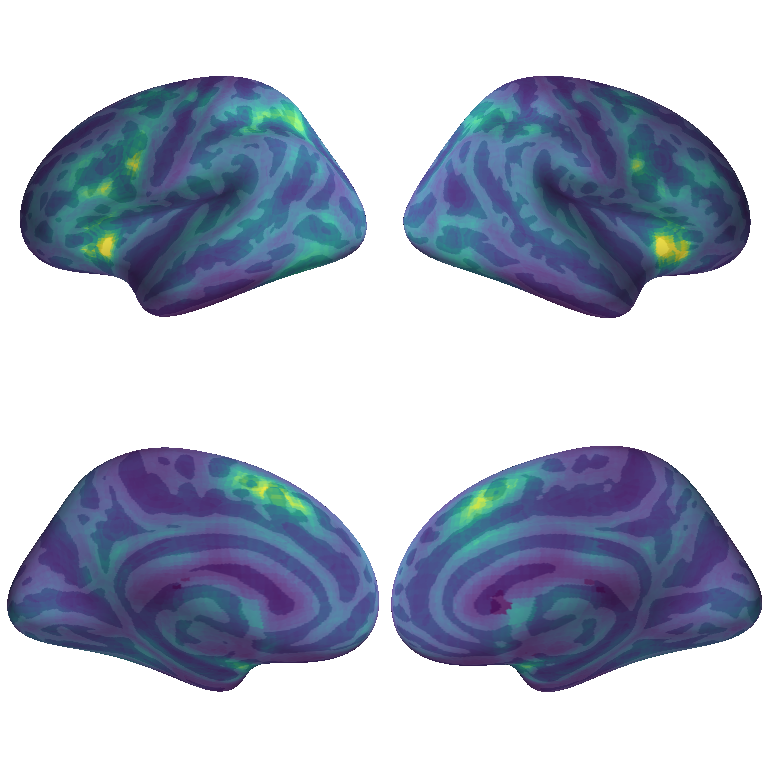

In [7]:
brain = Brain('fsaverage', 'split', 'inflated', cortex='bone', size=(780, 800), background='white', views=['lat', 'med'])
base.img_plot.display_bilateral(brain, activation_3d, colormap=plt.get_cmap('viridis').colors, max=.075, thresh=0, min=0, discrete=False)
out = '../reports/dissertation/figures/base_rate.png'
brain.save_image(out)
Image(out)

### Pain, negative affect and cognitive control meta-analysis

In [5]:
from neurosynth.analysis.meta import MetaAnalysis

In [139]:
shacktopics = ['8_conflict_interference_incongruent',  '23_pain_stimulation_somatosensory', '31_fear_anxiety_threat']
shackman = [MetaAnalysis(dataset, dataset.get_studies(features=topic, frequency_threshold=0.003)).images['pAgF_z_FDR_0.01'] for topic in shacktopics]
for img in shackman:
    img[img < 0] = 0
shackman = [nib.Nifti1Image(dataset.masker.unmask(img), affine=ref.get_affine()) for img in shackman]
shackoverlap = nib.Nifti1Image((
        (shackman[0].get_data() > 0) & (shackman[1].get_data() > 0) & (shackman[2].get_data() > 0)).astype('float'), affine=ref.get_affine())

In [138]:
unrelated_topics = ['58_memory_retrieval_encoding',  '0_social_empathy_moral', '56_visual_motion_perception']
unrelated = [MetaAnalysis(dataset, dataset.get_studies(features=topic, frequency_threshold=0.003)).images['pAgF_z_FDR_0.01'] for topic in unrelated_topics]
for img in unrelated:
    img[img < 0] = 0
unrelated = [nib.Nifti1Image(dataset.masker.unmask(img), affine=ref.get_affine()) for img in unrelated]
unrelated_overlap = nib.Nifti1Image((
        (unrelated[0].get_data() > 0) & (unrelated[1].get_data() > 0) & (unrelated[2].get_data() > 0)).astype('float'), affine=ref.get_affine())

In [157]:
colormaps = [sns.color_palette(name, 10) for name in ['viridis', 'BuGn', 'cool']]

In [160]:
brain = Brain('fsaverage', 'lh', 'inflated', cortex='bone', size=(780, 800), background='white', views=['med'])
for i, nifti in enumerate(shackman):
    with tempfile.NamedTemporaryFile(suffix='.nii.gz') as f:
        nib.save(nifti, f.name)

        l_surf = project_volume_data(f.name, "lh",
                            subject_id="fsaverage")

        brain.add_data(l_surf, hemi='lh', colormap=colormaps[i], thresh=0.001, colorbar=False, alpha=0.4)
with tempfile.NamedTemporaryFile(suffix='.nii.gz') as f:
    nib.save(shackoverlap, f.name)

    l_surf = project_volume_data(f.name, "lh",
                        subject_id="fsaverage", projsum='max', smooth_fwhm=0)

    brain.add_data(l_surf, hemi='lh', colormap=[(1, 1, 1), (1, 1, 1)], thresh=0.001, colorbar=False, alpha=0.95)

mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpb3ljup.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sXjVzmP.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpb3ljup.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sXjVzmP.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpu71L1M.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sHRa7O1.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpu71L1M.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sHRa7O1.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpy3euAZ.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2skEcxXy.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpy3euAZ.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2skEcxXy.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpjFRv6m.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sKN9UnD.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpjFRv6m.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sKN9UnD.mgz


In [156]:
brain = Brain('fsaverage', 'lh', 'inflated', cortex='bone', size=(780, 800), background='white', views=['med'])
for i, nifti in enumerate(unrelated):
    with tempfile.NamedTemporaryFile(suffix='.nii.gz') as f:
        nib.save(nifti, f.name)

        l_surf = project_volume_data(f.name, "lh",
                            subject_id="fsaverage")

        brain.add_data(l_surf, hemi='lh', colormap=colormaps[i], thresh=0.001, colorbar=False, alpha=0.4)
with tempfile.NamedTemporaryFile(suffix='.nii.gz') as f:
    nib.save(unrelated_overlap, f.name)

    l_surf = project_volume_data(f.name, "lh",
                        subject_id="fsaverage", projsum='max', smooth_fwhm=0)

    brain.add_data(l_surf, hemi='lh', colormap=[(1, 1, 1), (1, 1, 1)], thresh=0.001, colorbar=False, alpha=0.9)

mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpKwUJVT.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2s2AiGfw.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpKwUJVT.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2s2AiGfw.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpa09ENy.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sIkaRvn.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpa09ENy.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sIkaRvn.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpDx1GlU.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2s87iVXS.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpDx1GlU.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 3 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2s87iVXS.mgz


mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpGesFYz.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sTNHmIw.mgz


INFO:surfer:mri_vol2surf --mov /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/tmpGesFYz.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/k7/sjgnyj6j5z17gr14p3cnp0fc0000gn/T/pysurfer-v2sTNHmIw.mgz
